# Lasso Regression

The objective function of Lasso Regression, which is minimized, is defined as:

$$ \text{Minimize} \left( \frac{1}{n} \sum_{i=1}^{n} (y_i - X_i \beta)^2 + \alpha \sum_{j=1}^{p} |\beta_j| \right) $$

Where:
- $y_i$ is the actual value for the $i$-th observation.
- $X_i$ is the feature vector for the $i$-th observation.
- $\beta$ is the vector of regression coefficients.
- $n$ is the number of observations.
- $\alpha$ is a non-negative regularization parameter.
- $p$ is the number of features.

Another note: 
* Mean squared error
$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - X_i \beta)^2$$

* Lasso Regulation Term
$$ Lasso = \alpha \sum_{j=1}^{p} |\beta_j|  $$

In [8]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt

In [3]:
# Load the diabetes dataset
X, y = load_diabetes(return_X_y=True)

In [5]:
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (442, 10)
y shape: (442,)


In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
# Create a Lasso Regression model
lasso_model = Lasso(alpha=1.0)

# Train the model
lasso_model.fit(X_train, y_train)

# Make predictions
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# You can also access the model's coefficients
print(f"Coefficients: {lasso_model.coef_}")

Mean Squared Error: 3403.5757216070747
Coefficients: [  0.          -0.         413.43184792  34.83051518   0.
   0.          -0.           0.         258.15289363   0.        ]


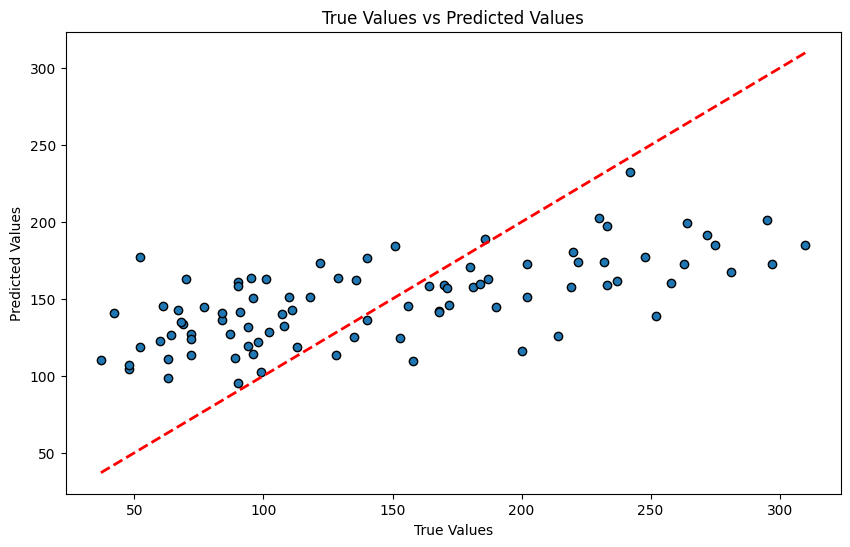

In [9]:
# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolor="black")
plt.plot(
    [min(y_test), max(y_test)],
    [min(y_test), max(y_test)],
    color="red",
    linestyle="--",
    lw=2,
)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True Values vs Predicted Values")
plt.show()

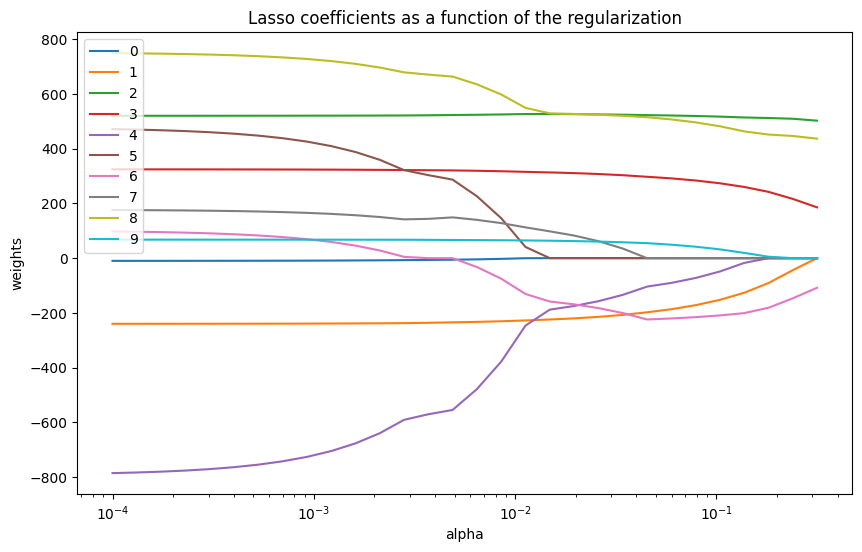

In [10]:
# List of alphas to try
alphas = np.logspace(-4, -0.5, 30)

# Initialize an array to store coefficients
coefs = []

# Train a Lasso Regression for each alpha and store the coefficients
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

# Plotting
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Lasso coefficients as a function of the regularization")
plt.axis("tight")
plt.legend(np.arange(X.shape[1]), loc="upper left")
plt.show()

# Real time visualization (not done)

ValueError: x and y must have same first dimension, but have shapes (2,) and (0,)

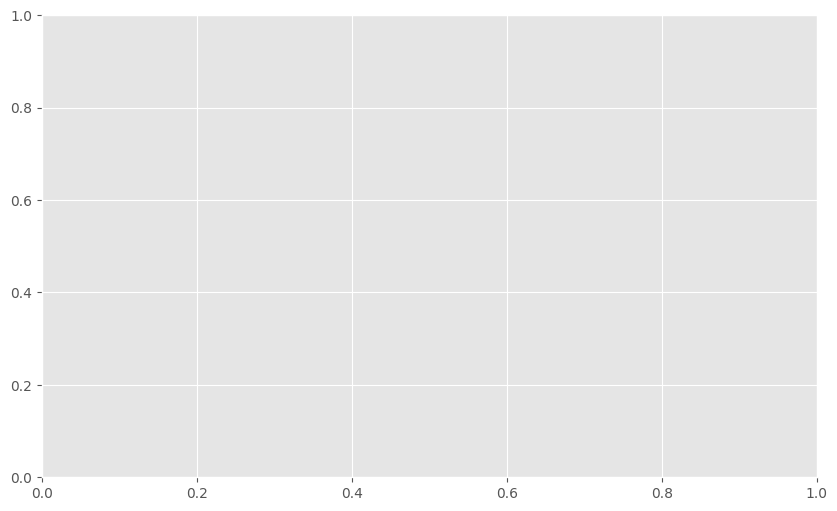

In [ ]:
from sklearn.linear_model import Lasso
from IPython.display import clear_output
import time

# We take the Train-test data from Ridge Regression above
X_train_lasso = X_train_ridge
y_train_lasso = y_train_ridge
X_test_lasso = X_test_ridge
y_test_lasso = y_test_ridge

# List of alphas to try
alpha_lasso = np.logspace(-4, 0.5, 30)

# Initialize coef
coefs_lasso = []

# Initialize r^2 (score)
scores_lasso = [0]

# Condtion to stop loop
# stopper_lasso = np.any((np.array(scores_lasso) > 0.99))

# Training the model with a while-loop
i = 0
i_s = [i]

# while stopper_lasso:
for i in range(20):
    # Iteration count
    # i += 1
    i_s.append(i)

    # Create a Pipeline which contain 2 steps
    pipeline_lasso = Pipeline(
        [
            ("scaler", StandardScaler()),  # Step 1: Normalization
            (
                "lasso",
                Lasso(alpha=alpha_lasso[i - 1], max_iter=10000),
            ),  # Step 2: Lasso
        ]
    )
    # Running model
    pipeline_lasso.fit(X=X_train_lasso, y=y_train_lasso)
    coefs_lasso.append(pipeline_lasso.named_steps["lasso"].coef_)
    scores_lasso.append(pipeline_lasso.score(X=X_test_lasso, y=y_test_lasso))

    # Plot realtime
    plt.figure(figsize=(10, 6))
    plt.plot(scores_lasso, alpha_lasso[:i], marker=0)
    plt.xlim(0, 20)
    plt.ylim(0, 1)
    plt.xlabel("Iteration")
    plt.ylabel("R^2")
    plt.title("Real Time Lasso Pipeline Supervisor")

    # Display the plot
    clear_output(wait=True)
    plt.show()

    # # Pause for each loop
    time.sleep(0.1)

    # print(alpha_lasso[:i])

# print(len(scores_lasso))
# print(alpha_lasso)